<span style='font-size:20pt'><b> 동적 계획법(Dynamic Programming)과 분할 정복(Divide and Conquer) </span></b>

#  정의

+ 동적계획법(DP)
    - 입력 크기가 작은 부분 문제들을 해결한 후, 해당 부분 문제의 해를 활용해서, 보다 큰 크기의 부분 문제를 해결, 최종적으로 전체 문제를 해결하는 알고리즘
    - <b>상향식 접근법</b>으로, 가장 최하위 해답을 구한 후, 이를 저장하고, 해당 결과값를 이용해서 상위 문제를 풀어가는 방식
    - <b>Memoization(저장) 기법을 사용함</b>
        - memoization : 프로그램 실행 시 이전에 계산한 값을 저장하여, 다시 계산하지 않도록 하여 전체 실행 속도를 빠르게 하는 기술
    
    - 문제를 잘게 쪼갤 때, <b>부분 문제는 중복되어, 재활용 됨</b>
        - 예 : 피보나치 수열


+ 분할 정복
    - 문제를 나눌 수 없을 때까지 나누어서 각각을 풀면서 다시 합병하여 문제의. 답을 얻는 알고리즘
    - <b>하향식 접근법</b>으로, 상위의 해답을 구하기 위해, 아래로 내려가면서 하위의 해답을 구하는 방식
        - 일반적으로 재귀함수로 구현
    - <b>문제를 잘게 쪼갤 때, 부분 문제는 서로 중복되지 않음</b> 동적계획법은 포함하면서 문제 푼다.
        - 예 : 병합 정렬, 퀵 정렬 등

# 공통점과 차이점

+ 공통점
    - 문제를 잘게 쪼개서, 가장 작은 단위로 분할
    
+ 차이점
    - 동적 계획법
        - 부분 문제는 중복되어, 상위 문제 해결 시 재활용 됨
        - memoization 기법 사용(부분 문제의 해답을 저장해서 재활용하는 최적화 기법으로 사용)
    
    - 분할 정복
        - 부분 문제는 서로 중복되지 않음
        - memoization 기법 사용하지 않음

# 동적 계획법 알고리즘 이해

## 피보나치 수열 예제

피보나치 수열
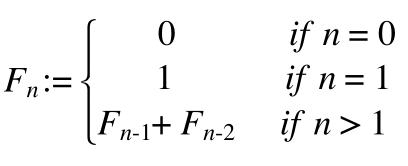

동적 계획법으로 풀이되는 이유

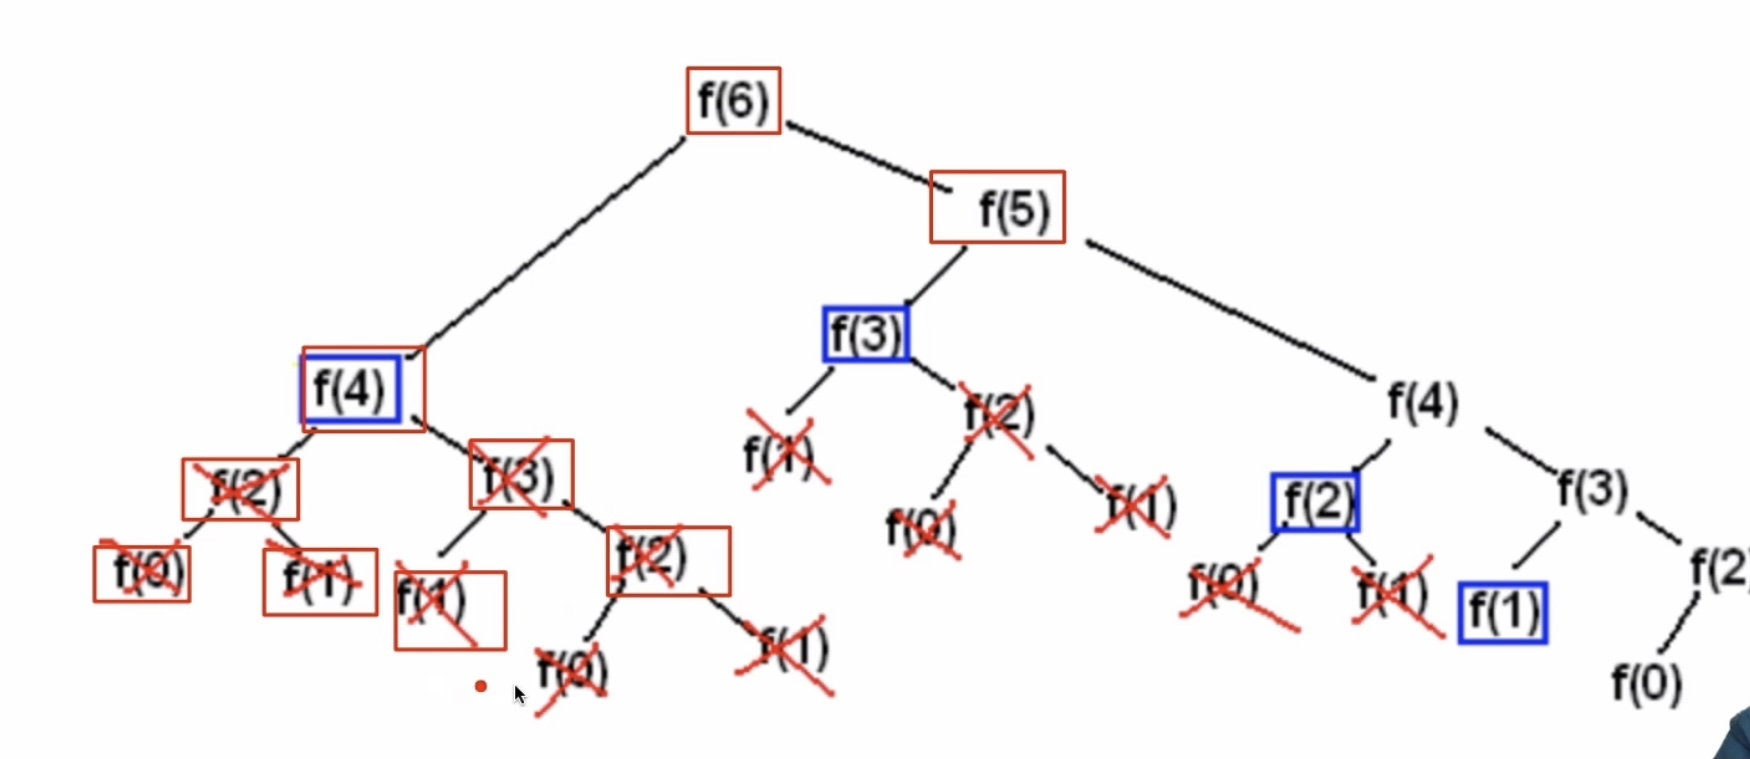

동적계획법을 사용하지 않으면 f(4)를 계산할 때 f(2)를 두번, f(1)을 3번 계산해야한다... 중복되는 경우를 따로 저장해서

나중에 재활용한다.

### recursive call 활용

In [3]:
def fibo(num):
    if num <= 1:
        return num
    return fibo(num - 1) + fibo(num - 2)

recursive call 의 문제

fibo(4) = fibo(3) + fibo(2)<br>
fibo(3) = fibo(2) + fibo(1)<br>
fibo(2) = fibo(1) + fibo(0)<br>

중복되는 부분을 계속 계산하게 됨

### DP로 풀이

In [6]:
def fibo_dp(num):
    #저장 공간을 만든다.
    cache = [0 for index in range(num + 1)]
    #0, 1일때는 return값이 정해져있으므로
    cache[0] = 0
    cache[1] = 1
    
    for index in range(2, num + 1):
        #cache에 저장시켜서 나중에 index로 기존에 중복되는 값은 그저 불러오게만 함
        cache[index] = cache[index - 1] + cache[index - 2]
    
    return cache[num]
        

In [8]:
fibo_dp(10)

55

# 분할 정복의 이해

분할 정복 알고리즘의 예는 병합 정렬과 퀵 정렬이 있고 이를 통해 이해 가능하다

## 퀵 정렬 (quick sort)

1. 퀵 정렬(quick sort) 이란?

+ 정렬 알고리즘의 꽃

+ <b>기준점(pivot) 을 정해서, 기준점보다 작은 데이터는 왼쪽(left), 큰 데이터는 오른쪽(right)으로 모으는 함수를 작성함</b>

+ 각 왼쪽, 오른쪽 은 <b>재귀용법</b>을 사용해서 다시 동일 함수를 호출하여 위 작업을 반복함

+ 함수는 왼쪽(left) + 기준점(pivot) + 오른쪽(right) 을 리턴함

2. 어떻게 코드로 구현할 것인가?

단계

1. pivot 선택

2. pivot을 제외한 다른 데이터와 피봇을 비교해서 [작은 데이터, pivot, 큰 데이터] 꼴로 분류하기

3. 2.에서 분류된 두 데이터 집단을 각각 정렬한다. 이때도 각각 집단에서 피봇을 정해서 분류

4. 데이터 수가 1개가 될 때까지 반복한다

5. 분류된 결과들을 합치면 정렬된 결과가 나온다

In [9]:
def qsort(data):
    if len(data) <= 1:
        return data
    
    #분배할 리스트 미리 생성
    left, right = list(), list()
    pivot = data[0]
    for index in range(1,len(data)):
        if pivot > data[index]:
            left.append(data[index])
        else:
            right.append(data[index])
    #기준점을 리스트로 반환해야 + 연산이됨 그래서 [pivot]
    return qsort(left) + [pivot] + qsort(right)

In [10]:
import random

data_list = random.sample(range(100),10)

qsort(data_list)

[8, 11, 22, 25, 52, 71, 81, 82, 83, 98]

### List comprehension 을 사용하여 더 간단하게 표현

In [13]:
def qsort(data):
    if len(data) <= 1:
        return data
    pivot = data[0]
    
    #data[1:] 의 값들 중 pivot보다 작은 값은 left에 넣어라...
    left = [item for item in data[1:] if pivot > item]
    right = [item for item in data[1:] if pivot <= item]
    
    return qsort(left) + [pivot] + qsort(right)

In [14]:
import random

data_list = random.sample(range(100),10)

qsort(data_list)

[6, 20, 25, 31, 43, 50, 61, 66, 67, 73]

### 퀵 정렬 분석

+ 병합정렬과 유사, 시간복잡도는 O(nlogn)
    - 단, 최악의 경우
        - 맨 처음 pivot이 가장 크거나, 가장 작으면
        - 모든 데이터를 비교하는 상황이 나옴
        - $O\left( n^{2} \right)$

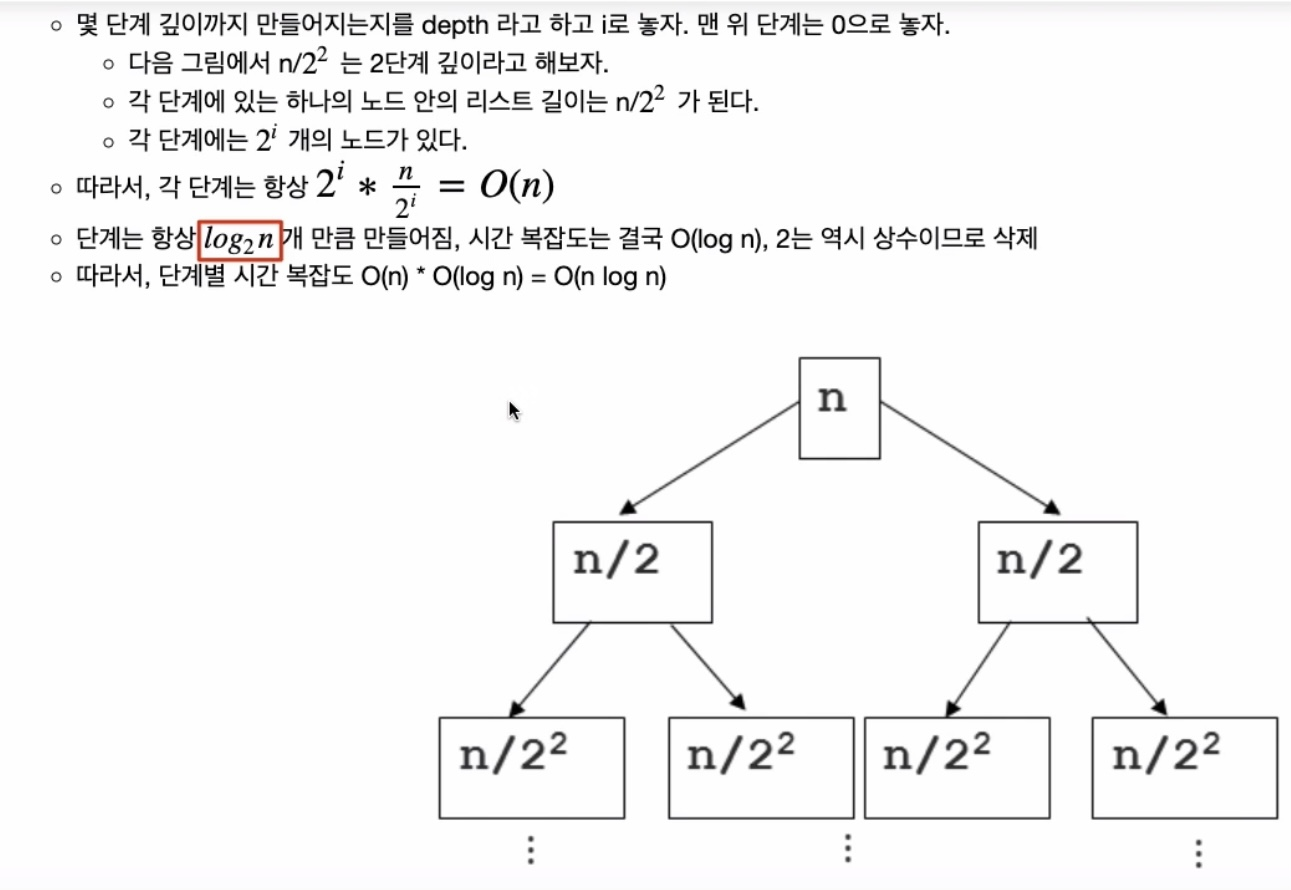

## 병합 정렬 ( merge sort)

+ 재귀 용법을 활용한 정렬 알고리즘

    1. 리스트를 절반으로 잘라 비슷한 크기의 두 부분 리스트로 나눈다.
    2. 각 부분 리스트를 재귀적으로 합병 정렬을 이용해 정렬한다.
    3. 두 부분 리스트를 다시 하나의 정렬된 리스트로 합병한다.
    

### 알고리즘 이해

+ 데이터가 4개 일 때

    - 예 : data_list = [1,9,3,2]
        - 먼저 [1,9] , [3,2] 로 나누고
        - 다시 앞 부분은 [1],[9] 로 나누고
        - 다시 정렬해서 합친다. [1,9]
        - 다음 [3,2]는 [3],[2]로 나누고
        - 다시 정렬해서 합친다 [2,3]
        - 이제 [1,9]와 [2,3]을 합친다.
            - 1 < 2 이니 [1] => [9], [2,3] 이 남으므로
            - 9 > 2 이니 [1,2] => [9], [3] 이 남으므로
            - 9 > 3 이니 [1,2,3] => [9] 가 남으므로
            - 9 밖에 없으니, [1,2,3,9]

### 알고리즘 구현

pseudo code

<b>split 함수의 return에 merge함수도 재귀로 포함한다는 것을 이해해야한다!!</b>

  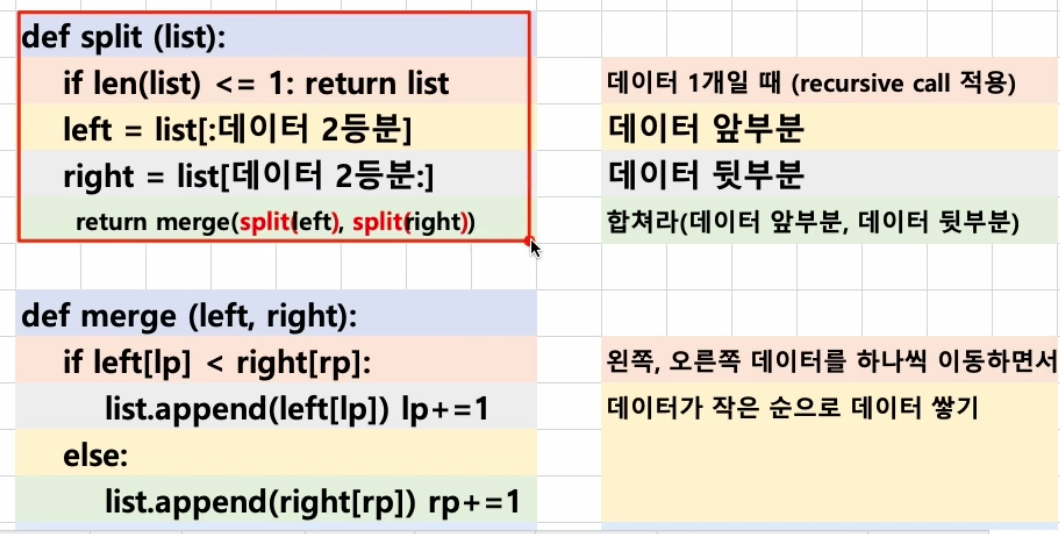

+ mergesplit 함수 만들기

    - 만약 리스트 개수가 한개이면 해당 값 리턴
    - 그렇지 않으면, 리스트를 앞뒤, 두 개로 나누기
    - left = mergesplit(앞)
    - right = mergesplit(뒤)
    - merge(left, right)
    

+ merge 함수 만들기
    - 리스트 변수 하나 만들기(sorted)
    - left_index, right_index = 0
    - while left_index < len(left) or right_index < len(right):
        - 만약 left_index나 right_index 가 이미 left 또는 right 리스트를 다 순회했다면, 그 반대쪽 데이터를 그대로 넣고, 해당 인덱스 1 증가
        - if left[left_index] < right[right_index]:
            - sorted.append(left[left_index])
            - left_index += 1
        
        - else:
            - sorted.append(right[right_index])
            - right_index += 1

### 코드로 구현하기

In [1]:
def split(data):
    medium = int(len(data) / 2)
    left = data[:medium]
    right = data[medium:]
    print(left, right)

In [2]:
data_list = [2,4,1,5,4]
split(data_list)

[2, 4] [1, 5, 4]


 Split 과 Merge 두 단계를 각각 함수로 나눠서 작성

In [3]:
def mergesplit(data):
    if len(data) <= 1:
        return data
    
    medium = int(len(data) / 2)
    left = mergesplit(data[:medium])
    right = mergesplit(data[medium:])
    return merge(left, right)

In [5]:
def merge(left, right):
    merged = list()
    left_point, right_point = 0, 0
    
    #case1 : left, right 다 데이터가 남아있을 때
    while len(left) > left_point and len(right) > right_point:
        if left[left_point] > right[right_point]:
            merged.append(right[right_point])
            right_point += 1
        else:
            merged.append(left[left_point])
            left_point += 1
    
    #case2 : left만 남아있을 때 (right 길이 가 더 짧아서 right는 이미 데이터가 다 정렬에 사용됨)
    while len(left) > left_point:
        #left만 남았고, left안은 정렬이 된 상태이므로 남아있는 것들을 그냥 다 갖다 붙히면 됨
        merged.append(left[left_point])
        left_point += 1
        
    
    #case3 : right만 남아있을 때
    while len(right) > right_point:
        merged.append(right[right_point])
        right_point += 1

    return merged

### 최종 코드

In [6]:
def merge(left, right):
    merged = list()
    left_point, right_point = 0, 0
    
    #case1 : left, right 다 데이터가 남아있을 때
    while len(left) > left_point and len(right) > right_point:
        if left[left_point] > right[right_point]:
            merged.append(right[right_point])
            right_point += 1
        else:
            merged.append(left[left_point])
            left_point += 1
    
    #case2 : left만 남아있을 때 (right 길이 가 더 짧아서 right는 이미 데이터가 다 정렬에 사용됨)
    while len(left) > left_point:
        #left만 남았고, left안은 정렬이 된 상태이므로 남아있는 것들을 그냥 다 갖다 붙히면 됨
        merged.append(left[left_point])
        left_point += 1
        
    
    #case3 : right만 남아있을 때
    while len(right) > right_point:
        merged.append(right[right_point])
        right_point += 1

    return merged

def mergesplit(data):
    if len(data) <= 1:
        return data
    
    medium = int(len(data) / 2)
    left = mergesplit(data[:medium])
    right = mergesplit(data[medium:])
    return merge(left, right)

In [8]:
import random

data_list = random.sample(range(100),10)

mergesplit(data_list)

[3, 7, 27, 34, 37, 41, 42, 62, 63, 94]

### 시간복잡도

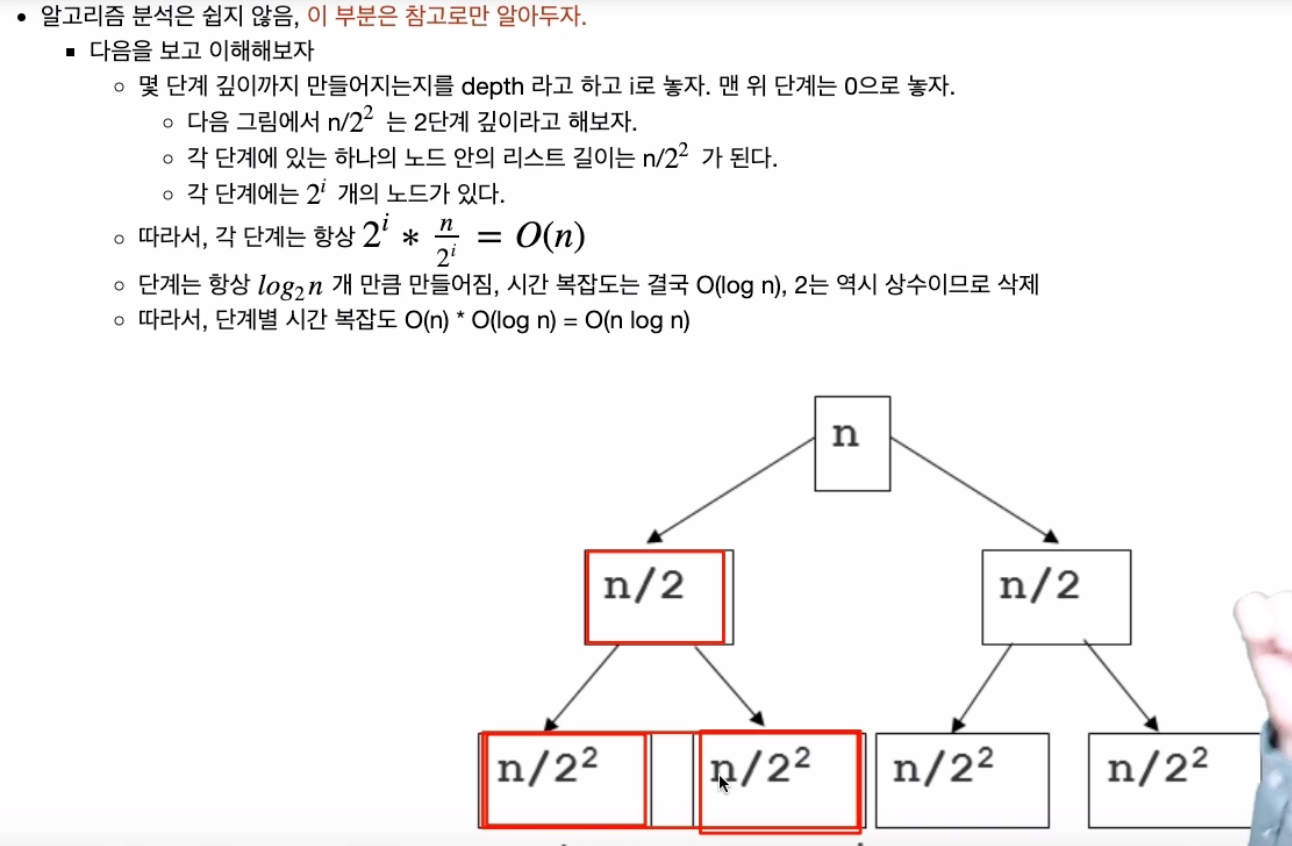